# Surface

In [1]:
import numpy as np
from time import time

In [2]:
import euchar.utils as u
import euchar.surface as s
import euchar.filtrations as f

In [3]:
from nice.plot import matplotlib_plot, discrete_scatter
from euchar.display import euler_curve_plot, euler_surface_plot

# 3d plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(0)
m = 32
img1 = np.random.randint(0, 256, (m, m))
img2 = np.random.randint(0, 256, (m, m))
IMG1 = np.random.randint(0, 256, (m, m, m))
IMG2 = np.random.randint(0, 256, (m, m, m))

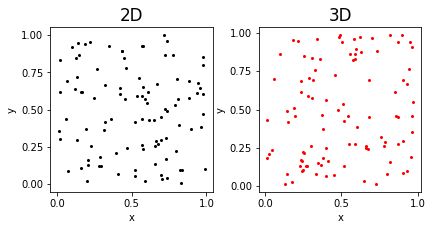

In [5]:
np.random.seed(0)
N = 100
pts2 = np.random.rand(N, 2)
pts3 = np.random.rand(N, 3)
fig, ax = matplotlib_plot(1, 2, figsize=(3,3))
discrete_scatter(ax[0], pts2, labels=[], title="2D")
discrete_scatter(ax[1], pts3, labels=[], color="r", title="3D")

In [6]:
simplices_2d, alpha_2d = f.alpha_filtration_2D(pts2)
density_2d = f.inverse_density_filtration(pts2, simplices_2d, n_neighbors=6)
print(simplices_2d.shape, alpha_2d.shape, density_2d.shape)

(569, 3) (569,) (569,)


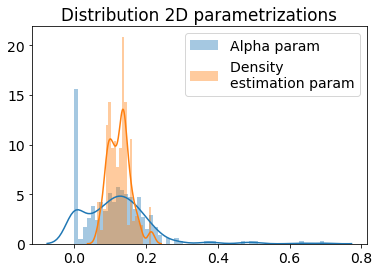

In [7]:
ax = sns.distplot(alpha_2d, label="Alpha param", bins=60)
ax = sns.distplot(density_2d, label="Density \nestimation param", bins=20)
ax.set(title="Distribution 2D parametrizations"); ax.legend();

In [8]:
simplices_3d, alpha_3d = f.alpha_filtration_3D(pts3)
density_3d = f.inverse_density_filtration(pts3, simplices_3d, n_neighbors=6)

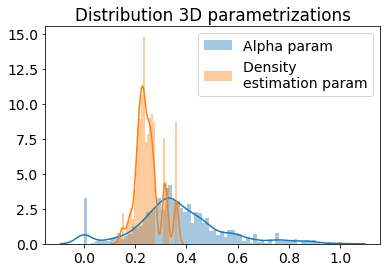

In [9]:
ax = sns.distplot(alpha_3d, label="Alpha param", bins=70)
ax = sns.distplot(density_3d, label="Density \nestimation param", bins=30)
ax.set(title="Distribution 3D parametrizations"); ax.legend();

***

### Surface .images_2D

In [10]:
bins = np.linspace(0, 255, num=256)
surf2d = s.images_2D(img1, img2)

NameError: name 'fig' is not defined

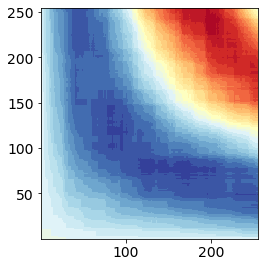

In [12]:
fig, ax = matplotlib_plot()
euler_surface_plot(ax, bins, bins, surf2d, figsize=(2.4, 2), title="Surface - 2D images", font_size=10)

### Image with function

In [13]:
#from cv2 import dilate
#kernel = np.ones((3,3), np.uint8)

#D = dilate((img1<60).astype(np.uint8), kernel)
#np.sum(D), np.prod(img1.shape)

### Surface .images_3D

In [14]:
#v = np.load("C:\\Users\\44792\\data\\research\\vectors_euler_changes\\changes_3d.npy")

#surf3d = s.images_3D(IMG1, IMG2, v, 255, 255)

In [15]:
#fig, ax = euler_surface_plot(bins, bins, surf3d, figsize=(5,4), title="Surface - 3D images")

***

### Surface .bifiltration

In [17]:
st = time()
surf = s.bifiltration(simplices_2d, alpha_2d, density_2d, bins1, bins2)
print(f"time: {time() -st:.3f}")
surf = np.copy(surf)

time: 0.003


In [18]:
surf

array([[  0,   0,  21,  69,  98, 100, 100, 100, 100, 100],
       [  0,   0,   5,  15,  29,  30,  30,  30,  30,  30],
       [  0,   0,   3,   2, -11, -11, -11, -11, -11, -11],
       [  0,   0,   3,   3,   1,   1,   1,   1,   1,   1],
       [  0,   0,   3,   3,   1,   1,   1,   1,   1,   1],
       [  0,   0,   3,   2,   1,   1,   1,   1,   1,   1],
       [  0,   0,   3,   2,   1,   1,   1,   1,   1,   1],
       [  0,   0,   3,   2,   1,   1,   1,   1,   1,   1],
       [  0,   0,   3,   2,   1,   1,   1,   1,   1,   1],
       [  0,   0,   3,   2,   1,   1,   1,   1,   1,   1]])

***
### Python implementation of bifiltration

In [20]:
def dim_simplex(sim):
    return np.sum(sim != -1)-1

def py_bifiltration(simplices, par1, par2, bins1, bins2):
    surface = np.empty(shape=(len(bins1), len(bins2)), dtype=int)
    
    for i, s in enumerate(bins1):
        for j, t in enumerate(bins2):
            local_simplices = np.copy(simplices)
            mask1 = (par1 <= s)
            mask2 = (par2 <= t)
            local_simplices = local_simplices[np.logical_and(mask1, mask2)]
            dimensions = [(-1)**dim_simplex(sim) for sim in local_simplices]
            surface[i, j] = sum(dimensions) 
    return surface

In [21]:
pysurf = py_bifiltration(simplices_2d, alpha_2d, density_2d, bins1, bins2)

In [22]:
(surf == pysurf).all()

True

In [23]:
pysurf

array([[  0,   0,  21,  69,  98, 100, 100, 100, 100, 100],
       [  0,   0,   5,  15,  29,  30,  30,  30,  30,  30],
       [  0,   0,   3,   2, -11, -11, -11, -11, -11, -11],
       [  0,   0,   3,   3,   1,   1,   1,   1,   1,   1],
       [  0,   0,   3,   3,   1,   1,   1,   1,   1,   1],
       [  0,   0,   3,   2,   1,   1,   1,   1,   1,   1],
       [  0,   0,   3,   2,   1,   1,   1,   1,   1,   1],
       [  0,   0,   3,   2,   1,   1,   1,   1,   1,   1],
       [  0,   0,   3,   2,   1,   1,   1,   1,   1,   1],
       [  0,   0,   3,   2,   1,   1,   1,   1,   1,   1]])

In [24]:
fig, ax = euler_surface_plot(bins1, bins2, surf_points2d, n_levels=10)

NameError: name 'surf_points2d' is not defined

In [25]:
fig, ax = euler_surface_plot(bins1, bins2, surf, n_levels=10)

TypeError: euler_surface_plot() missing 1 required positional argument: 'euler_char_surf'

In [26]:
fig, ax = euler_surface_plot(bins1, bins2, pysurf, n_levels=10)

TypeError: euler_surface_plot() missing 1 required positional argument: 'euler_char_surf'